In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def BRISK_create():
    BRISK = cv.BRISK_create()

    return BRISK

In [ ]:
def BRISK_cv_matcher(desc1, desc2):
  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  matches = bf.match(desc1, desc2)
  return sorted(matches, key=lambda match: match.distance)

In [ ]:
def BRISK_norm_hamming(desc1, desc2):
  r = (1 << np.arange(8))[:,None]
  return np.count_nonzero( (desc1 & r) != (desc2 & r) )

In [ ]:
def BRISK_own_matcher(desc1, desc2):
  desc1_len = desc1.shape[0]
  desc2_len = desc2.shape[0]
  matches = []
  for i in range(desc1_len):
    best_match = None
    min_dist = math.inf
    for j in range(desc2_len):
      dist = BRISK_norm_hamming(desc1[i], desc2[j])
      if dist < min_dist:
        min_dist = dist
        best_match = cv.DMatch(_distance=dist, _imgIdx=0, _queryIdx=i,_trainIdx=j)
    matches.append(best_match)

  return sorted(matches, key=lambda match: match.distance)
      

In [ ]:
def plot_keypoints(img1, kp1, img2, kp2, matches):
  result = cv.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.figure(figsize=(20,20))
  plt.imshow(result) 
  plt.show()

In [ ]:
img_original = cv.imread("image_original.jpg", cv.IMREAD_GRAYSCALE)
img_original_rotated = cv.imread("image_original_rotated.jpg", cv.IMREAD_GRAYSCALE)

In [ ]:
BRISK = BRISK_create()
kp_original, desc_original = BRISK.detectAndCompute(img_original, None)
kp_original_rotated, desc_original_rotated = BRISK.detectAndCompute(img_original_rotated, None)

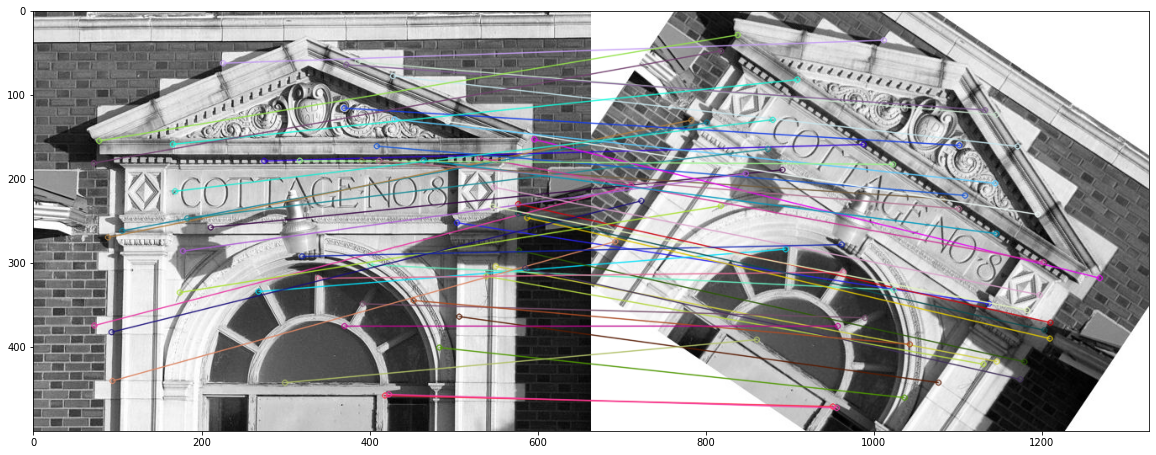

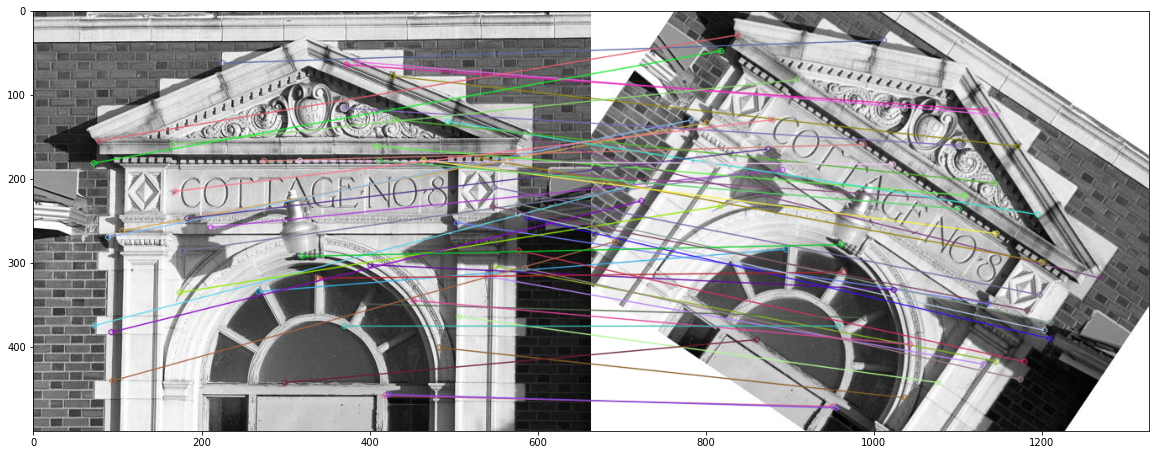

In [ ]:
plot_keypoints(img_original, 
               kp_original, 
               img_original_rotated, 
               kp_original_rotated, 
               BRISK_own_matcher(desc_original, desc_original_rotated)[:50])
plot_keypoints(img_original, 
               kp_original, 
               img_original_rotated, 
               kp_original_rotated, 
               BRISK_cv_matcher(desc_original, desc_original_rotated)[:50])
